# SciPy
- SciPy(Scientific Python)는 과학 계산과 통계 분석을 위한 고급 수학 함수와 알고리즘을 제공하는 파이썬 라이브러리
- SciPy는 NumPy를 기반으로 구축되었으며, 다양한 수학적 함수와 알고리즘을 제공하여 과학, 공학, 데이터 분석 분야에서 폭넓게 활용
- SciPy는 단순한 수학 연산을 넘어, 최적화, 보간(interpolation), 선형 대수, 신호 처리, 확률 분포 및 통계 분석, 미적분 계산, FFT 변환 등과 같은 고급 과학 계산 기능을 지원

## 사용이유
- SciPy를 사용하는 이유는 데이터 시각화에서 정교한 수학적 연산을 수행하여 데이터를 정제하고 의미를 극대화하기 위해서임
- 데이터 시각화는 단순히 그래프를 그리는 것이 아니라, 데이터의 의미를 효과적으로 전달하는 과정
- 실제 데이터는 노이즈, 결측값, 복잡한 패턴, 왜곡된 형태를 가질 수 있으며, 이를 제대로 표현하지 않으면 잘못된 해석을 초래
- SciPy는 보간(interpolation), 필터링(filtering), 최적화(optimization), 변환(transformation), 통계 분석(statistical analysis) 등을 통해 데이터를 정제하고 변환하기 때문에 정확하고 신뢰할 수 있는 시각화가 가능

### 기본문법

In [2]:
import numpy as np  # NumPy 라이브러리 불러오기
import pandas as pd
import seaborn as sns

import scipy  # SciPy 라이브러리 불러오기

from scipy import optimize  # 최적화 모듈 불러오기
from scipy import stats  # 통계 모듈 불러오기
from scipy import signal  # 신호 처리 모듈 불러오기
from scipy import interpolate  # 보간법 모듈 불러오기
from scipy import integrate  # 적분 및 미분 방정식 모듈 불러오기
from scipy import linalg  # 선형대수 모듈 불러오기

## 최적화 (Optimization) - 함수 최솟값 찾기

In [3]:
import numpy as np  # NumPy 라이브러리 불러오기
import scipy  # SciPy 라이브러리 불러오기
from scipy import optimize, stats, signal, interpolate, integrate, linalg  # SciPy의 주요 모듈 임포트

# 예제 함수 정의 (y = x^2 + 5)
def func(x):  # 최적화할 함수 정의
    return x**2 + 5  # 입력값 x에 대해 x^2 + 5 반환

# 최솟값 찾기
# x0은 최적화 시작점(초기값, initial guess)을 의미함. 수학에서는 초기 추정값이라고 부름. 즉, 알고리즘이 함수 func의 최솟값을 찾기 위해 처음 탐색을 시작하는 위치를 3으로 설정한 것.
# minimize()는 연속적인 실수 공간에서 내부적으로 경사 하강법(gradient descent)이나 뉴턴 방법(Newton’s method) 같은 최적화 기법을 사용하여, 함수 값이 줄어드는 방향으로 x 값을 갱신합니다.
result = optimize.minimize(func, x0=3)  # 초기값 x0=3에서부터 함수의 최소값 찾기

# 결과 확인
print("최적화 결과:", result.x)  # 최적화된 x 값 출력

최적화 결과: [-2.83269601e-08]


In [4]:
import matplotlib.pyplot as plt

x = np.linspace(-10, 10, 100)
y = (x-2) ** 2 + 5
result = optimize.minimize(lambda x : (x-2) ** 2 + 5, x0=-10)
result

  message: Optimization terminated successfully.
  success: True
   status: 0
      fun: 5.000000000000012
        x: [ 2.000e+00]
      nit: 2
      jac: [ 2.980e-07]
 hess_inv: [[ 5.000e-01]]
     nfev: 8
     njev: 4

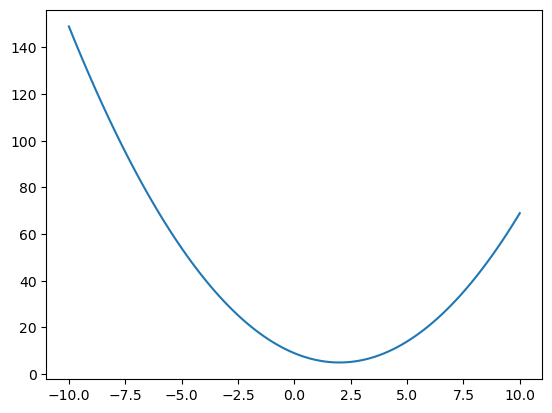

In [5]:
plt.plot(x, y)

In [6]:
-2.83269601e-08 == 0

False

In [7]:
 1e-6 == 0.000001

True

In [8]:
abs(-2.83269601e-08) < 1e-6   # True → 사실상 0으로 간주

True

## 통계 분석 (Statistics) - 정규 분포 생성 및 분석
- SciPy의 `scipy.stats` 모듈을 사용하면 다양한 확률 분포를 생성하고 분석할 수 있음

In [9]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

# 표준정규분포에서 난수 5개 추출 (평균 = 0, 표준편차 = 1)
random_samples = stats.norm.rvs(loc=0, scale=1, size=5)
random_samples

array([ 1.93551387, -1.40502278,  0.01008709,  1.2756215 ,  0.53726664])

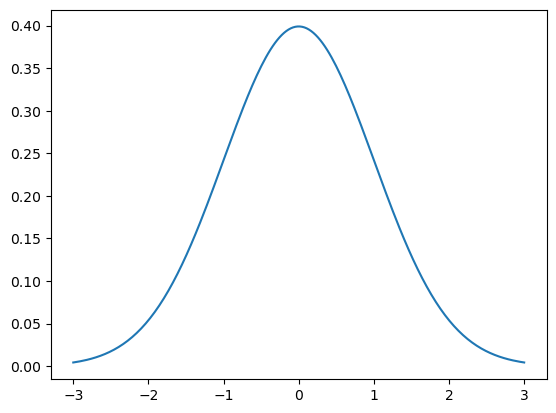

In [10]:
# PDF 곡선을 위한 x, y 데이터
x = np.linspace(-3, 3, 200)
pdf_values = stats.norm.pdf(x, loc=0, scale=1)
plt.plot(x, pdf_values)
plt.show()

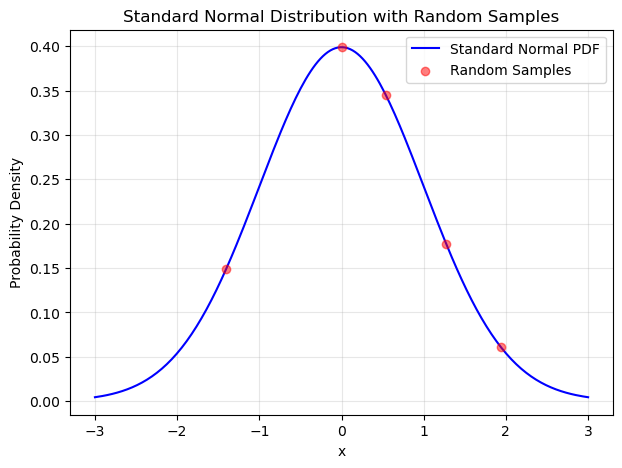

In [11]:
# 시각화
plt.figure(figsize=(7,5))

# 정규분포 PDF 곡선
plt.plot(x, pdf_values, label="Standard Normal PDF", color="blue")

# 샘플 5개 점 찍기
plt.scatter(random_samples, stats.norm.pdf(random_samples, 0, 1),
            color="red", zorder=2, alpha=.5, label="Random Samples")

plt.title("Standard Normal Distribution with Random Samples")
plt.xlabel("x")
plt.ylabel("Probability Density")
plt.legend()
plt.grid(alpha=0.3)
plt.show()

## 신호 처리 (Signal Processing) - 푸리에 변환 (FFT)

- SciPy의 scipy.fft 모듈을 사용하면 주어진 신호를 주파수 도메인으로 변환
- 푸리에 변환(FFT, Fast Fourier Transform)은 시간에 따라 변화하는 신호를 여러 개의 주파수 성분으로 분해하여, 신호에 어떤 주파수가 포함되어 있는지를 분석

<center><img src='https://devincody.github.io/Blog/post/an_intuitive_interpretation_of_the_fourier_transform/img/FFT-Time-Frequency-View_hu24c1c8fe894ecd0dad24174b2bed08c9_99850_800x0_resize_lanczos_2.png' width='60%'></center>

In [12]:
from scipy.fft import fft  # scipy의 FFT 함수를 불러옴

two_pi = 2 * np.pi   # 2π, 라디안 변환 상수, (한 주기 = 2π 라디안)
frequency = 5        # 주파수 (Hz, 1초에 5번 진동) # 신호 데이터 생성 (5Hz의 사인파)
t = np.linspace(0, 1, 500)  # 0초부터 1초까지 500개의 균일한 샘플을 생성, 시간축 데이터
signal = np.sin(two_pi * frequency * t)  # 주파수 5Hz의 사인파를 생성

# 푸리에 변환 적용
fft_result = fft(signal)  # 신호 데이터에 대해 푸리에 변환 수행

# 결과 확인
print("푸리에 변환 결과(일부):", fft_result[:5])  # 푸리에 변환 결과의 일부(처음 5개 값)를 출력

푸리에 변환 결과(일부): [-4.66293670e-15-0.j          1.30573001e-03-0.20781065j
  5.96550477e-03-0.4746948j   1.75907509e-02-0.93310779j
  5.53273795e-02-2.20094295j]


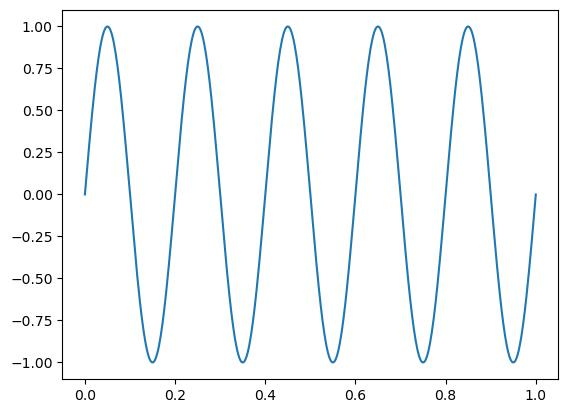

In [13]:
plt.plot(t, signal)
plt.show()

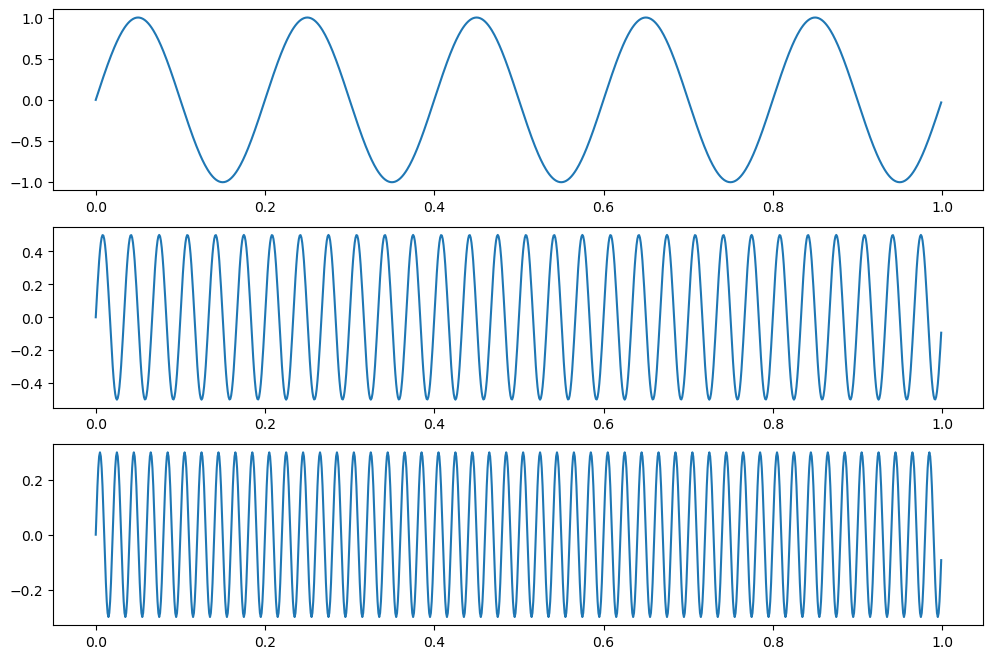

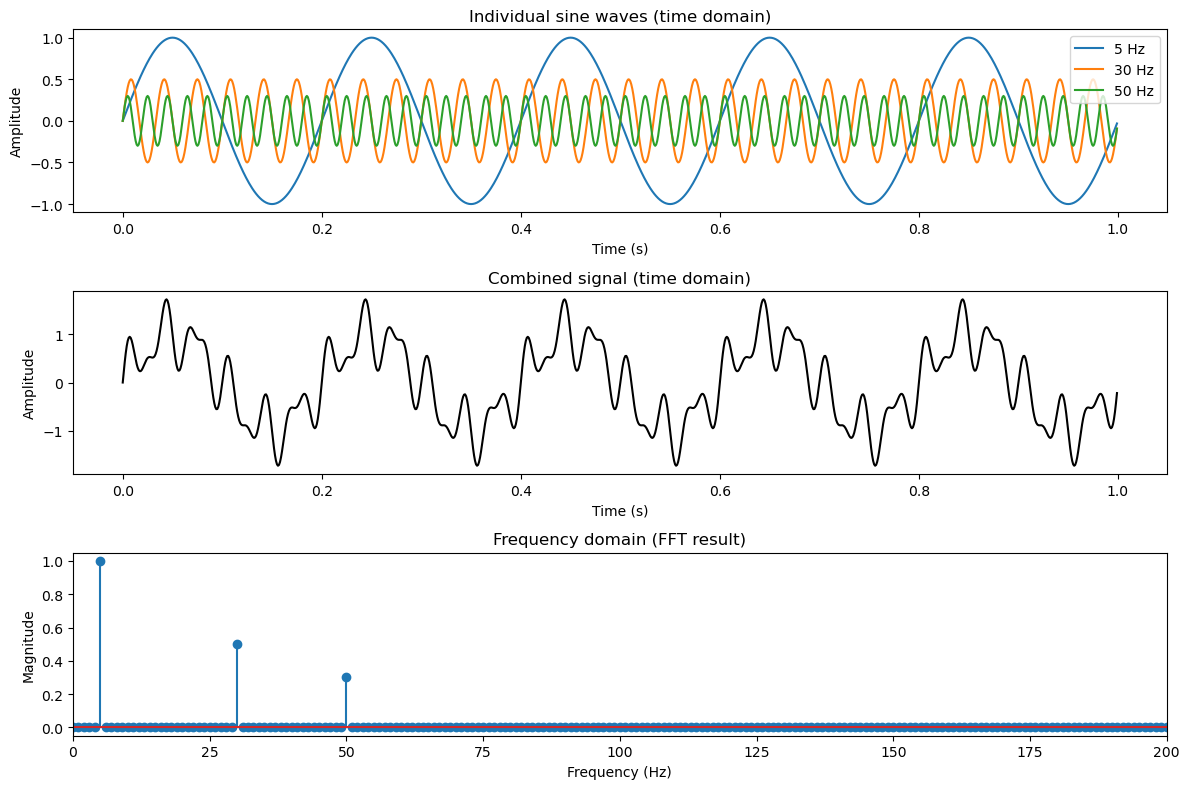

In [8]:
import numpy as np
import matplotlib.pyplot as plt

# Sampling parameters
fs = 1000  # sampling frequency (Hz)
t = np.linspace(0, 1, fs, endpoint=False)  # 1 second

# Define signals (sine waves with different frequencies)
f1, f2, f3 = 5, 30, 50  # Hz
signal1 = np.sin(2 * np.pi * f1 * t)
signal2 = 0.5 * np.sin(2 * np.pi * f2 * t)  
signal3 = 0.3 * np.sin(2 * np.pi * f3 * t)  

# Combined signal
signal = signal1 + signal2 + signal3

# Fourier Transform
fft_result = np.fft.fft(signal)
fft_freqs = np.fft.fftfreq(len(signal), 1/fs)

# Take only positive frequencies
positive_freqs = fft_freqs[:len(signal)//2]
positive_magnitude = np.abs(fft_result[:len(signal)//2]) * (2/len(signal))


# Visualization
plt.figure(figsize=(12, 8))

# Individual signals
plt.subplot(3, 1, 1)
plt.plot(t, signal1, label=f"{f1} Hz")
plt.plot(t, signal2, label=f"{f2} Hz")
plt.plot(t, signal3, label=f"{f3} Hz")
plt.title("Individual sine waves (time domain)")
plt.xlabel("Time (s)")
plt.ylabel("Amplitude")
plt.legend()

# Combined signal
plt.subplot(3, 1, 2)
plt.plot(t, signal, color="black")
plt.title("Combined signal (time domain)")
plt.xlabel("Time (s)")
plt.ylabel("Amplitude")

# Frequency domain
plt.subplot(3, 1, 3)
plt.stem(positive_freqs, positive_magnitude)
plt.title("Frequency domain (FFT result)")
plt.xlabel("Frequency (Hz)")
plt.ylabel("Magnitude")
plt.xlim(0, 200)

plt.tight_layout()
plt.show()

In [14]:
# 적분할 함수 정의 (y = x^2)
def func(x):  # 함수 정의 시작
    return x**2  # 입력값 x에 대해 x^2을 반환

# 0부터 3까지 정적분 계산 
# func 함수를 [0, 3] 구간에서 정적분하고 오차도 반환
# 0 → 하한(lower limit): 적분을 시작하는 값, 3 → 상한(upper limit): 적분을 끝내는 값
integral, error = integrate.quad(func, 0, 3) 

# 결과 출력
print("정적분 결과:", integral)  # 계산된 정적분 결과를 출력

정적분 결과: 9.0


# 정규분포 (Normal Distribution)
- 정규 분포는 데이터가 평균을 중심으로 좌우 대칭을 이루며 종형 곡선을 따르는 확률 분포
- 정규 분포는 자연 현상과 다양한 실험 데이터에서 빈번하게 나타나는 분포이며, 통계 분석 및 머신러닝에서 가장 중요한 확률 분포 중 하나

$$ f\left(x\right)=\frac{1}{\sqrt{2\pi\sigma^{2}}}e^{-\frac{\left(x-\mu\right)^{2}}{2\sigma^{2}}} $$


- $\mu$ = 평균 (Mean)
- $\sigma$ = 표준편차 (Standard  Deviation)
- $\pi$ = 3.14159...
- $e$ = 2.71828...

<img src='imgs/normal_distribution.png'>

Q: 확률 밀도 함수(PDF)는 “값이 나타날 가능성을 설명한다”고 했는데, 퍼센트로 표현된다는 뜻인가요?
> 확률 밀도 함수(PDF) 값은 곧바로 “퍼센트(%) 확률”을 의미하지 않습니다.
> 연속형 확률 분포에서는 특정한 한 점에서의 확률은 0이고, 대신 구간 전체에 대한 곡선 아래 면적이 실제 확률(0~1 범위)로 해석됩니다.
> - x축 값은 확률 변수(예: 시험 점수, 키, 무게 등)를 의미합니다.
> - y축 값(PDF 값)은 해당 x값 주변에 확률이 얼마나 밀집되어 있는지를 나타내는 밀도(density)입니다.

> 따라서 PDF의 y값이 크다는 것은 “그 x 근처 구간에 데이터가 많이 몰려 있다”는 뜻이지, 그 점에서의 확률이 퍼센트로 존재한다는 의미는 아닙니다.
> 실제 확률(퍼센트)은 a ≤ x ≤ b 구간의 PDF 곡선 아래 면적을 적분하여 계산합니다.
> 즉, PDF는 확률 분포의 모양을 나타내고(y축: 밀도, x축: 변수), 구간 면적이 실제 확률이라고 이해하면 됩니다.

### 표준 정규 분포(Standard Normal Distribution)와 Z-점수 변환
- 정규 분포를 표준화하면 평균이 0, 표준 편차가 1인 분포가 되며, 이를 표준 정규 분포(Standard Normal Distribution)
- 표준 정규 분포에서는 Z-점수(Z-Score) 변환을 통해 원본 데이터를 표준화
$$ Z = \frac{X - \mu}{\sigma} $$
    - $X$ : 원본데이터값
    - $\mu$ : 평균
    - $\sigma$ : 표준 편차
    - $Z$ : 변환된 표준 점수 

### 1. 정규 분포 데이터 생성 및 확인
- NumPy를 활용하여 평균 50, 표준 편차 10을 가지는 정규 분포 데이터를 생성

In [53]:
import numpy as np  # NumPy 라이브러리를 불러옴
import scipy.stats as stats  # SciPy의 통계 모듈을 불러옴
import matplotlib.pyplot as plt  # Matplotlib의 pyplot 모듈을 불러옴
import seaborn as sns  # Seaborn 라이브러리를 불러옴

# 난수 생성의 일관성을 유지하기 위해 시드 값을 설정
np.random.seed(42)  
 # 평균이 50, 표준 편차가 10인 정규 분포에서 1000개의 난수를 생성
data = np.random.normal(loc=50, scale=10, size=10000) 
# 생성된 데이터 배열의 상위 5개 값을 출력
print(data[:5])  

[54.96714153 48.61735699 56.47688538 65.23029856 47.65846625]


### 2. 정규 분포의 확률 밀도 함수(PDF) 시각화
- 정규 분포의 확률 밀도 함수(Probability Density Function, PDF)를 시각화하면 데이터의 분포 형태를 쉽게 확인

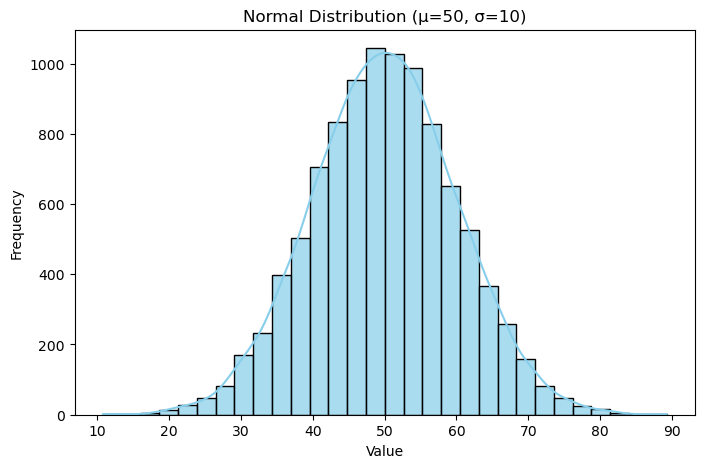

In [54]:
# 그래프 크기 설정
plt.figure(figsize=(8, 5))  # 그래프의 크기를 가로 8인치, 세로 5인치로 설정

# 정규 분포 PDF 시각화
sns.histplot(data, bins=30, kde=True, color="skyblue", alpha=0.7)  # 히스토그램을 그리며 커널 밀도 추정(kde)을 추가

# 그래프 설정
plt.title("Normal Distribution (μ=50, σ=10)")  # 그래프 제목 설정
plt.xlabel("Value")  # x축 라벨 설정
plt.ylabel("Frequency")  # y축 라벨 설정
plt.show()  # 그래프 출력

### 3. 특정 값의 확률 밀도 계산 (PDF 활용)
- 특정 값 x=55가 정규 분포에서 얼마나 자주 발생할지를 확률 밀도 함수(PDF)를 사용하여 계산

In [55]:
# 특정 값 x에서의 확률 밀도 계산 (PDF)
x_value = 55
pdf_value = stats.norm.pdf(x_value, loc=50, scale=10)

# 결과 출력
print(f"f({x_value}) = {pdf_value}")

f(55) = 0.03520653267642995


- 평균 50, 표준편차 10인 정규 분포에서 x=55의 확률 밀도 값(PDF)을 나타냄
- 확률 밀도 함수(PDF)는 특정 x 값에서의 상대적인 발생 가능성을 의미함
- x=55에서의 확률 밀도가 0.0352이므로, 평균 50 부근보다 발생 가능성이 낮음

### 4. 특정 값 이하의 누적 확률 계산 (CDF 활용)
- 누적 분포 함수(CDF)를 사용하면 특정 값 이하의 데이터가 전체 데이터에서 차지하는 비율을 계산
- 예를 들어, 점수 x=55 이하의 확률을 계산

In [56]:
x_value = 55  # 누적 확률을 계산할 특정 값 설정
cdf_value = stats.norm.cdf(x_value, loc=50, scale=10)  # 평균 50, 표준편차 10인 정규분포에서 x_value 이하의 누적 확률 계산

print(f"P(X ≤ {x_value}) = {cdf_value:.4f}")  # 계산된 누적 확률을 소수점 4자리까지 출력

P(X ≤ 55) = 0.6915


### 5. 분위수 계산 (PPF 활용)
- 확률 분포에서 특정 분위수에 해당하는 값을 계산 가능
- 예를 들어, 상위 10%에 해당하는 점수를 찾는 경우 ppf(0.90)을 사용

In [62]:
quantile_90 = stats.norm.ppf(0.90, loc=50, scale=10)  # 평균 50, 표준편차 10인 정규분포에서 누적 확률 90%일 때 분위수 계산

print(f"90th percentile value = {quantile_90:.2f}")  # 계산된 분위수 값을 소수점 두 자리까지 출력

90th percentile value = 62.82


### 6. 정규 분포를 활용한 이상값 탐지
- 정규 분포를 활용하여 평균에서 ±2σ 또는 ±3σ 이상 떨어진 값을 이상값(Outlier)으로 탐지

In [ ]:
# 이상값 탐지 기준 (평균 ± 2표준 편차)
lower_bound = 50 - 2 * 10  # 이상값 하한을 평균(50)에서 2배의 표준 편차(10)를 뺀 값으로 설정
upper_bound = 50 + 2 * 10  # 이상값 상한을 평균(50)에서 2배의 표준 편차(10)를 더한 값으로 설정

# 이상값 필터링
outliers = data[(data < lower_bound) | (data > upper_bound)]  # 데이터에서 하한보다 작거나 상한보다 큰 값을 이상값으로 선택


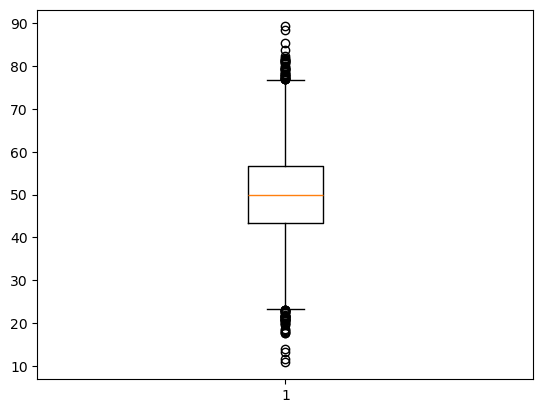

In [68]:
plt.boxplot(data)
plt.show()

In [65]:
# 결과 출력
print(f"이상값 개수: {len(outliers)}")  # 이상값의 개수를 출력
print(outliers[:5])  # 이상값 목록을 출력

이상값 개수: 467
[23.80254896 74.63242112 71.90455626 77.20169167 88.52731491]


# 가설 검정(Hypothesis Testing)
- 통계적 방법을 이용하여 가설이 맞는지 아닌지를 판단하는 과정
- 예를 들어, `"비타민을 먹으면 집중력이 향상될까?"` 라는 의문이 있다고 가정
- 이를 확인하기 위해 비타민을 먹은 그룹과 먹지 않은 그룹의 집중력 점수를 비교하고, 차이가 우연이 아니라 실제로 존재하는지를 검정하는 것이 가설 검정
- 가설 검정은 기본적으로 두 가지 가설을 세우는 것에서 시작

|||
|-|-|
|종류|가설|
|귀무가설(Null Hypothesis, $H_0$)|비타민을 먹어도 집중력에는 차이가 없다.|
|대립가설(Alternative Hypothesis, $H_1$) | 비타민을 먹으면 집중력이 향상된다.|


- 이후, 표본 데이터를 기반으로 귀무가설이 맞는지 여부를 판단하기 위해 사용하는 지표인 검정 통계량(Test Statistic)을 계산하고, 계산 값을 확률적으로 해석하여 귀무가설을 기각할지 결정

<center><img src='imgs/type_1_and_2_error.png' width='60%'></center>

|||
|-|-|
|개념|설명|
|1종 오류 (Type I Error)|- 1종 오류는 실제로 귀무가설이 참인데, 이를 잘못 기각하는 오류입니다.<br>- 쉽게 말해, "효과가 없는데 있다고 착각하는 실수"입니다.<br>- 예를 들어, "실제로 약이 효과가 없는데 효과가 있다고 결론을 내리는 경우"입니다.|
|2종 오류 (Type II Error)|- 2종 오류는 실제로 대립가설이 참인데, 귀무가설을 기각하지 않는 오류입니다.<br>- 쉽게 말해, "효과가 있는데 없다고 판단하는 실수"입니다.<br>- 예를 들어, "실제로 약이 효과가 있는데 효과가 없다고 결론을 내리는 경우"입니다.|



Q : 그래프에서 빨간색 점선은 뭐예요?
> 그래프에서 빨간색 점선으로 표시되어있는 것은 임계값(Critical Value, 가설 검정에서 귀무가설을 기각할 기준이 되는 경계 값)이며, 값은 1.64입니다.
> 검정 통계량이 이 값을 초과하면 귀무가설(H₀)을 기각합니다.
> 즉, 검정 통계량이 1.64 이상이면 귀무가설을 기각하고, 그렇지 않으면 귀무가설을 유지하게 됩니다.

### 가설 검정의 일반적인 절차

1. 가설설정 : 귀무가설($H_0$)과 대립가설($H_1$)을 명확히 정의
2. 유의수준 결정 : 가설을 기각할 기준을 설정합니다. 일반적으로 0.05(5%)를 사용
3. 검정 통계량 계산 : 적절한 검정 방법을 선택하고 검정 통계량을 계산
4. $p$값 계산 및 해석 : 검정 통계량을 이용해 $p$값을 구하고 해석
5. 결론도출 : 가설 검정 결과를 해석하고 최종 결론 도출

### 가설 검정의 주요 유형

|||
|-|-|
|검정종류|설명|
|단일 표본 t-검정 (One-Sample t-test)| 한 그룹의 평균이 특정 값과 다른지 검정합니다.<br>- 예: "한 도시의 평균 키가 170cm와 다른가?"|
|독립 표본 t-검정 (Independent t-test)| 두 그룹의 평균 차이를 검정합니다.<br>- 예: "남성과 여성의 평균 체온이 같은가?"|
|대응 표본 t-검정 (Paired t-test)| 동일한 그룹의 전/후 변화를 비교합니다.<br>- 예: "운동 프로그램 전후 체중 변화가 있는가?"|
|카이제곱 검정 (Chi-Square Test)| 범주형 변수 간 독립성을 검정합니다.<br>- 예: "흡연과 폐암 발병률 사이에 연관이 있는가?"|
|ANOVA (분산 분석, Analysis of Variance)| 세 개 이상의 그룹 간 평균 차이를 검정합니다.<br>- 예: "세 개의 학급 간 시험 성적 차이가 존재하는가?"|
|회귀 분석 (Regression Analysis)| 한 변수(X)가 다른 변수(Y)에 미치는 영향을 검정합니다.<br>- 예: "광고비가 매출에 미치는 영향이 있는가?"|



### 사용이유
- 가설 검정은 보이는 차이가 우연이 아니라 통계적으로 유의미한 차이인지 검증하기 위해서 사용
- 데이터를 시각화하면 패턴과 차이를 직관적으로 이해하기 쉬워지지만, 그래프에서 보이는 차이가 실제로 의미 있는 것인지 확인하려면 통계적 검증이 필요
- 단순한 시각적 비교만으로는 데이터의 변동성이 자연스러운 것인지, 아니면 실제로 유의미한 차이가 존재하는 것인지 판단할 수 없음
- 이때 가설 검정(Hypothesis Testing) 을 활용하면, 데이터 간 차이가 우연인지, 통계적으로 유의미한 차이인지를 수치적으로 검증 가능

### 1. 데이터 준비 및 확인
- 먼저, 가설 검정을 수행할 샘플 데이터를 생성합니다.

In [22]:
import numpy as np  # 수치 계산을 위한 NumPy 불러오기
import pandas as pd  # 데이터 처리 및 분석을 위한 Pandas 불러오기
from scipy import stats  # 가설 검정을 위한 SciPy stats 모듈 불러오기

# 데이터 생성 (두 그룹의 평균 차이를 비교하는 예제)
np.random.seed(42)  # 랜덤 시드를 42로 설정하여 결과의 재현성을 보장
group_A = np.random.normal(loc=50, scale=10, size=30)  # 평균이 50, 표준 편차가 10인 정규 분포 데이터 30개 생성
group_B = np.random.normal(loc=55, scale=10, size=30)  # 평균이 55, 표준 편차가 10인 정규 분포 데이터 30개 생성

# 데이터프레임 생성 및 확인
df = pd.DataFrame({"Group A": group_A, "Group B": group_B})  # 그룹 A와 그룹 B 데이터를 포함한 데이터프레임 생성
df.head().reset_index()  # 상위 5개 행을 출력하고 인덱스를 초기화하여 표시

,index,Group A,Group B
0,0,54.967142,48.982934
1,1,48.617357,73.522782
2,2,56.476885,54.865028
3,3,65.230299,44.422891
4,4,47.658466,63.225449


### 2. 독립 표본 t-검정 (Independent t-test) 수행
- 독립 표본 t-검정을 사용하여 두 그룹(A, B)의 평균 차이가 유의미한지 검정

In [23]:
# 독립 표본 t-검정 수행
t_stat, p_value = stats.ttest_ind(group_A, group_B)  # 두 그룹(group_A, group_B)에 대한 독립 표본 t-검정 수행

# 결과 출력
print(f"t-통계량: {t_stat}")  # t-검정의 검정 통계량을 출력
print(f"p-값: {p_value}")  # t-검정의 유의확률(p-value)을 출력

t-통계량: -2.398115152010242
p-값: 0.019717941865758207


- `t-통계량: -2.398115152010242`: 두 그룹 간 평균 차이를 나타내는 검정 통계량 값임
- `p-value : 0.019717941865758207` : 귀무가설을 기각할 가능성을 나타내는 유의확률임
- 일반적으로 `p-value < 0.05`이면 유의수준 5%에서 두 그룹의 평균 차이가 통계적으로 유의미함
- 따라서, `p-value=0.0197`은 0.05보다 작으므로 두 그룹 간 평균 차이가 유의미하다고 판단됨

### 3. 가설 검정을 활용한 데이터 시각화
- 가설 검정 결과를 데이터 시각화와 함께 활용하면 차이가 보다 직관적으로 보임


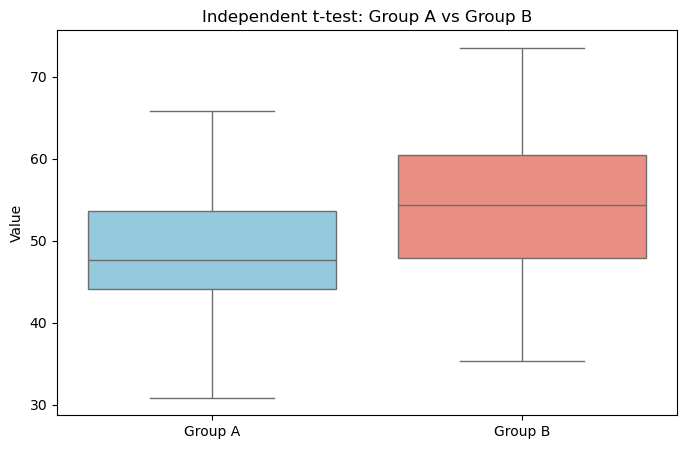

In [24]:
import matplotlib.pyplot as plt  # 데이터 시각화를 위한 Matplotlib 불러오기
import seaborn as sns  # 고급 시각화를 위한 Seaborn 불러오기

# 그래프 크기 설정(가로 8, 세로 5)
plt.figure(figsize=(8, 5))

# 두 그룹의 분포를 박스 플롯으로 시각화
sns.boxplot(data=[group_A, group_B], palette=["skyblue", "salmon"])

# 그래프 설정
plt.xticks([0, 1], ["Group A", "Group B"])  # x축 라벨 설정
plt.ylabel("Value")  # y축 라벨 설정
plt.title("Independent t-test: Group A vs Group B")  # 그래프 제목 설정

# 그래프 출력
plt.show()

# 통계적 시각화(Statistical Visualization)
- 통계적 시각화는 데이터의 분포, 관계, 추세 등을 효과적으로 분석하기 위해 통계적 기법을 활용하여 그래프나 차트로 표현하는 과정
- 단순한 시각화와 달리, 통계적인 요약 및 분석을 포함하여 데이터의 패턴과 특성을 보다 깊이 있게 탐색하는 것이 목적
-통계적 시각화를 통해 숫자로만 표현된 통계값을 직관적으로 이해할 수 있으며, 이상값, 분포 형태, 변수 간 관계 등을 쉽게 파악
<center>
    <img src='imgs/stat_viz.png'>
</center>

### 1. Matplotlib을 활용한 기본적인 통계적 시각화
- 먼저, Numpy를 사용하여 정규 분포를 따르는 데이터를 생성

In [26]:
import numpy as np  # 배열 연산을 위한 NumPy 불러오기
import pandas as pd  # 데이터프레임 생성 및 처리를 위한 Pandas 불러오기
import matplotlib.pyplot as plt  # 데이터 시각화를 위한 Matplotlib 불러오기

# 데이터 생성 (평균=50, 표준편차=10인 정규 분포 데이터 1000개)
np.random.seed(42)  # 난수 생성 고정
data = np.random.normal(loc=50, scale=10, size=1000)  # 평균 50, 표준편차 10인 정규 분포에서 1000개 샘플 생성

# 데이터프레임 변환
df = pd.DataFrame(data, columns=["value"])  # 데이터 배열을 Pandas 데이터프레임으로 변환하고 "value" 열 이름 지정

# 데이터 확인
df.head().reset_index()  # 데이터프레임의 상위 5개 행을 출력하고 인덱스를 초기화하여 표시

,index,value
0,0,54.967142
1,1,48.617357
2,2,56.476885
3,3,65.230299
4,4,47.658466


### 1.2 히스토그램(Histogram)

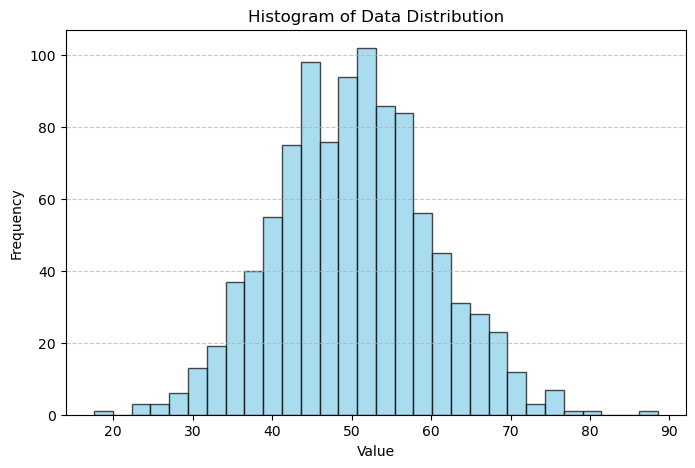

In [27]:
plt.figure(figsize=(8, 5))  # 그래프 크기를 가로 8, 세로 5로 설정
plt.hist(df["value"], bins=30, color="skyblue", edgecolor="black", alpha=0.7)  # "value" 열 데이터로 히스토그램을 생성하고 30개의 구간으로 나눔
plt.title("Histogram of Data Distribution")  # 그래프 제목을 "Histogram of Data Distribution"으로 설정
plt.xlabel("Value")  # x축 라벨을 "Value"로 설정
plt.ylabel("Frequency")  # y축 라벨을 "Frequency"로 설정
plt.grid(axis="y", linestyle="--", alpha=0.7)  # y축 기준으로 점선 스타일의 격자 추가
plt.show()  # 그래프를 출력

### 1.3 박스플롯(Boxplot)

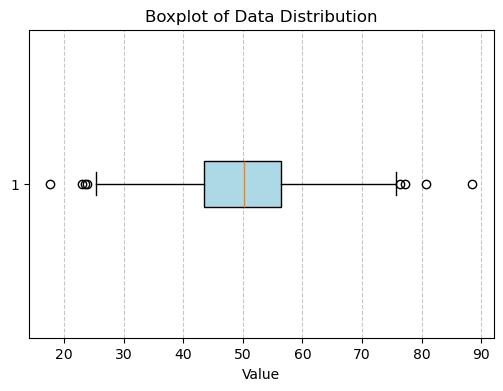

In [28]:
plt.figure(figsize=(6, 4))  # 그래프 크기를 가로 6, 세로 4로 설정
plt.boxplot(df["value"], vert=False, patch_artist=True, boxprops=dict(facecolor="lightblue"))  # "value" 열 데이터로 가로 방향 박스플롯 생성 및 색상 적용
plt.title("Boxplot of Data Distribution")  # 그래프 제목을 "Boxplot of Data Distribution"으로 설정
plt.xlabel("Value")  # x축 라벨을 "Value"로 설정
plt.grid(axis="x", linestyle="--", alpha=0.7)  # x축 기준으로 점선 스타일의 격자 추가
plt.show()  # 그래프를 출력

### 1.4 산점도(Scatter Plot)

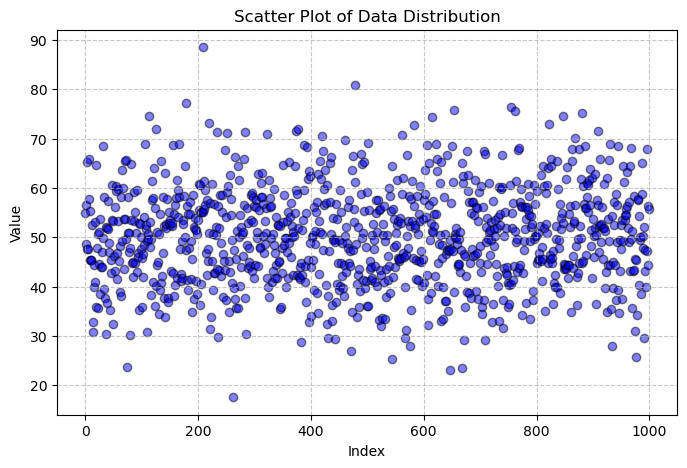

In [29]:
plt.figure(figsize=(8, 5))  # 그래프 크기를 가로 8, 세로 5로 설정
plt.scatter(range(len(df)), df["value"], alpha=0.5, color="blue", edgecolors="black")  # 데이터 개수를 x축으로, "value" 열 값을 y축으로 하여 산점도 생성
plt.title("Scatter Plot of Data Distribution")  # 그래프 제목을 "Scatter Plot of Data Distribution"으로 설정
plt.xlabel("Index")  # x축 라벨을 "Index"로 설정
plt.ylabel("Value")  # y축 라벨을 "Value"로 설정
plt.grid(linestyle="--", alpha=0.7)  # 점선 스타일의 격자 추가
plt.show()  # 그래프를 출력

### 2. Seaborn을 활용한 확장된 통계적 시각화


### 2.1 히스토그램 + KDE (Kernel Density Estimation)

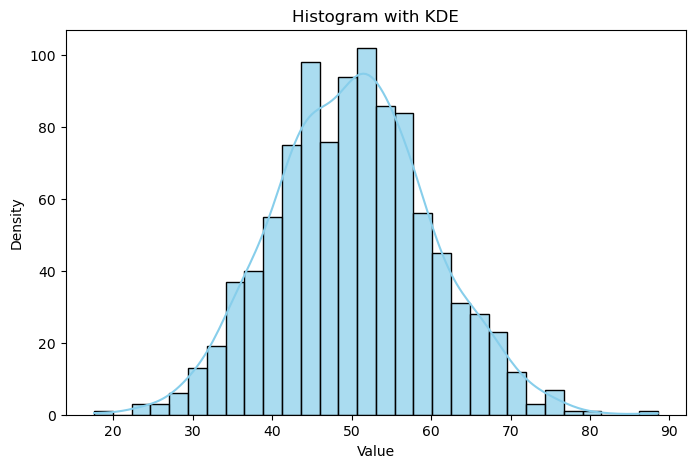

In [30]:
import seaborn as sns  # Seaborn 라이브러리를 불러옴

plt.figure(figsize=(8, 5))  # 그래프 크기를 가로 8, 세로 5로 설정
sns.histplot(df["value"], bins=30, kde=True, color="skyblue", alpha=0.7)  # "value" 열의 히스토그램을 생성하고 30개 구간으로 나누며 KDE(커널 밀도 추정) 추가
plt.title("Histogram with KDE")  # 그래프 제목을 "Histogram with KDE"로 설정
plt.xlabel("Value")  # x축 라벨을 "Value"로 설정
plt.ylabel("Density")  # y축 라벨을 "Density"로 설정
plt.show()  # 그래프를 출력

### 2.2 Seaborn 박스플롯

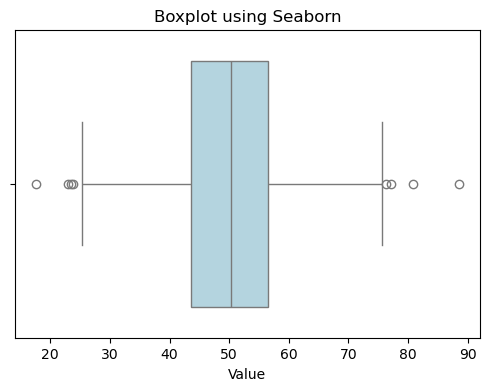

In [31]:
plt.figure(figsize=(6, 4))  # 그래프 크기 설정
sns.boxplot(x=df["value"], color="lightblue")  # 박스플롯 생성
plt.title("Boxplot using Seaborn")  # 그래프 제목 설정
plt.xlabel("Value")  # x축 라벨 설정
plt.show()  # 그래프 출력

### 2.3 바이올린 플롯(Violin Plot)

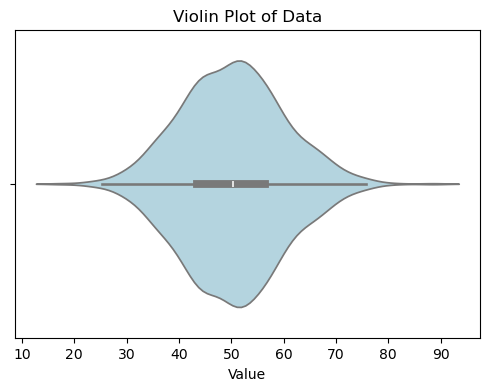

In [32]:
plt.figure(figsize=(6, 4))  # 그래프 크기를 가로 6, 세로 4로 설정
sns.violinplot(x=df["value"], color="lightblue")  # "value" 열 데이터를 사용하여 바이올린 플롯을 생성하고 색상을 연한 파란색으로 설정
plt.title("Violin Plot of Data")  # 그래프 제목을 "Violin Plot of Data"로 설정
plt.xlabel("Value")  # x축 라벨을 "Value"로 설정
plt.show()  # 그래프를 출력

### 3. SciPy + Seaborn 활용해 가설 검정 후 시각화
- SciPy를 활용하여 평균 차이 검정(독립 표본 t-검정), 카이제곱 검정 등 가설 검정을 수행한 후, 그 결과를 Seaborn을 활용하여 시각화

### 3.1 독립 표본 t-검정 (Independent t-test)
- 독립 표본 t-검정은 두 개의 서로 다른 그룹의 평균 차이가 통계적으로 유의미한지를 검정하는 방법
- 한 회사에서 A/B 테스트를 진행하여 광고 A를 본 그룹과 광고 B를 본 그룹의 구매 금액 차이를 비교한다고 가정

1. 데이터 생성

In [113]:
import numpy as np
import pandas as pd
import seaborn as sns
import scipy.stats as stats
import matplotlib.pyplot as plt

# 데이터 생성
np.random.seed(42)  # 랜덤 시드 고정

group_A = np.random.normal(loc=55, scale=10, size=100)  # 광고 A를 본 고객의 구매 금액
group_B = np.random.normal(loc=50, scale=10, size=100)  # 광고 B를 본 고객의 구매 금액

# 데이터프레임 생성
df_ab_test = pd.DataFrame({
    "value": np.concatenate([group_A, group_B]),  # 두 그룹 데이터를 하나로 합침
    "group": ["A"] * 100 + ["B"] * 100  # 그룹 레이블 추가
})

In [114]:
# 데이터 확인
df_ab_test.head(2).reset_index()  # 상위 5개 데이터 출력

,index,value,group
0,0,59.967142,A
1,1,53.617357,A


In [111]:
df_ab_test.tail(2).reset_index()  

,index,value,group
0,198,50.582087,B
1,199,38.570297,B


In [112]:
df_ab_test.groupby('group')['value'].mean()

group
A    53.961535
B    50.223046
Name: value, dtype: float64

2. 독립 표본 t-검정 수행

In [38]:
# 독립 표본 t-검정 수행
t_stat, p_value = stats.ttest_ind(group_A, group_B, equal_var=False)  # 두 그룹 간 평균 차이를 검정하는 독립 표본 t-검정 수행 (등분산 가정 X)

# 결과 출력
print(f"t-statistic: {t_stat:.4f}, p-value: {p_value:.4f}")  # t-통계량과 p-값을 소수점 네 자리까지 출력

t-statistic: 2.8388, p-value: 0.0050


3. 검정 결과를 박스플롯으로 시각화

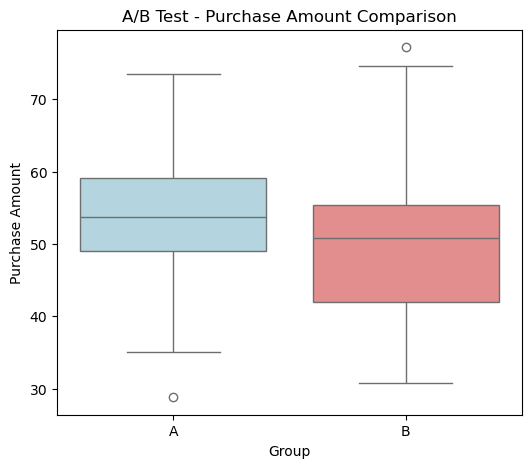

In [39]:
plt.figure(figsize=(6, 5))  # 그래프 크기를 가로 6, 세로 5로 설정
sns.boxplot(x="group", y="value", hue="group", data=df_ab_test, palette=["lightblue", "lightcoral"], legend=False)  # 그룹별 구매 금액을 비교하는 박스플롯 생성, 그룹별 색상 적용, 범례 표시 비활성화
plt.title("A/B Test - Purchase Amount Comparison")  # 그래프 제목을 "A/B Test - Purchase Amount Comparison"으로 설정
plt.xlabel("Group")  # x축 라벨을 "Group"으로 설정
plt.ylabel("Purchase Amount")  # y축 라벨을 "Purchase Amount"로 설정
plt.show()  # 그래프를 출력

### 3.2 카이제곱 검정 (Chi-Square Test)
- 카이제곱 검정은 두 범주형 변수 간의 연관성을 검정하는 통계 방법
- 한 마케팅 회사에서 광고 A와 광고 B를 본 고객들이 실제로 구매(Yes) 또는 미구매(No)한 비율이 차이가 있는지를 검정한다고 가정

1. 데이터 생성

In [40]:
# 광고 A/B 그룹별 구매 여부 데이터 생성
observed_data = pd.DataFrame({
    "Ad_A": [40, 60],  # 광고 A를 본 후 구매(40명) vs 미구매(60명)
    "Ad_B": [30, 70]   # 광고 B를 본 후 구매(30명) vs 미구매(70명)
}, index=["Purchase", "No Purchase"])  # 행 이름 추가

# 데이터 확인
print(observed_data.reset_index())

         index  Ad_A  Ad_B
0     Purchase    40    30
1  No Purchase    60    70


2. 카이제곱 검정 수행

In [41]:
# 카이제곱 검정 수행
chi2_stat, p_value, dof, expected = stats.chi2_contingency(observed_data)  # 독립성 검정을 위한 카이제곱 검정 수행

# 결과 출력
print(f"Chi-Square Statistic: {chi2_stat:.4f}, p-value: {p_value:.4f}")  # 카이제곱 통계량과 p-값을 소수점 네 자리까지 출력

Chi-Square Statistic: 1.7802, p-value: 0.1821


- Chi-Square Statistic: 1.7802는 카이제곱 검정 통계량 값임
- p-value: 0.1821은 귀무가설(H0: 광고 A와 B의 구매율 차이가 없음)을 검정하는 p-값임
- p-값이 0.05보다 크므로 유의수준 5%에서 귀무가설을 기각할 수 없음
- 즉, 광고 A와 광고 B의 구매율 차이가 통계적으로 유의미하지 않음
- 광고 A가 광고 B보다 구매율이 높을 가능성은 있지만, 이 차이가 우연에 의해 발생했을 가능성이 있음

3. 검정 결과를 시각화 (집계된 구매율 막대 그래프)

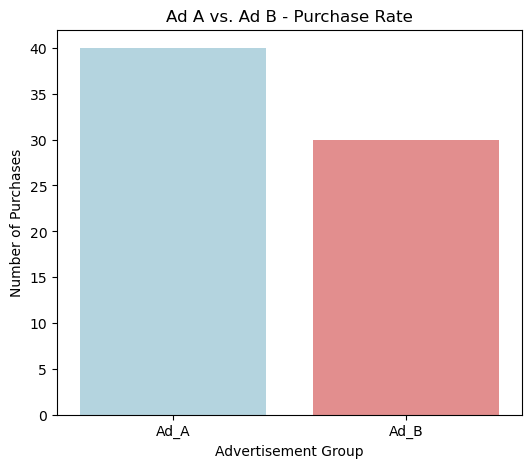

In [48]:
plt.figure(figsize=(6, 5))  # 그래프 크기를 가로 6, 세로 5로 설정
sns.barplot(x=observed_data.columns, y=observed_data.loc["Purchase"], hue=observed_data.columns, palette=["lightblue", "lightcoral"])  # 광고 그룹별 구매 수를 나타내는 막대 그래프 생성, 그룹별 색상 적용
plt.title("Ad A vs. Ad B - Purchase Rate")  # 그래프 제목을 "Ad A vs. Ad B - Purchase Rate"로 설정
plt.xlabel("Advertisement Group")  # x축 라벨을 "Advertisement Group"으로 설정
plt.ylabel("Number of Purchases")  # y축 라벨을 "Number of Purchases"로 설정
plt.show()  # 그래프를 출력

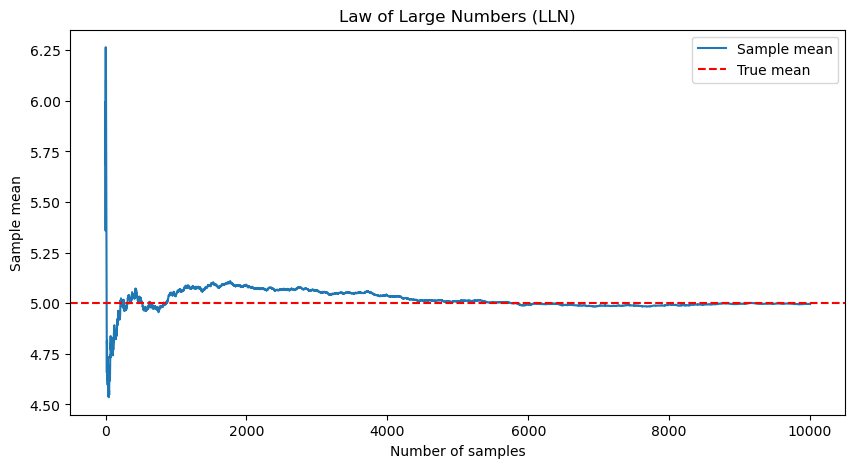

In [106]:
np.random.seed(42)

mu_true = 5        # 모평균
sigma = 2          # 모표준편차
n_trials = 10000   # 전체 샘플 개수

samples = np.random.normal(mu_true, sigma, n_trials)
sample_means = [samples[:i].mean() for i in range(1, n_trials+1)]

plt.figure(figsize=(10,5))
plt.plot(sample_means, label="Sample mean")
plt.axhline(mu_true, color='red', linestyle='--', label="True mean")
plt.xlabel("Number of samples")
plt.ylabel("Sample mean")
plt.title("Law of Large Numbers (LLN)")
plt.legend()
plt.savefig('imgs/law_of_large_numbers.png', dpi=300)
plt.show()



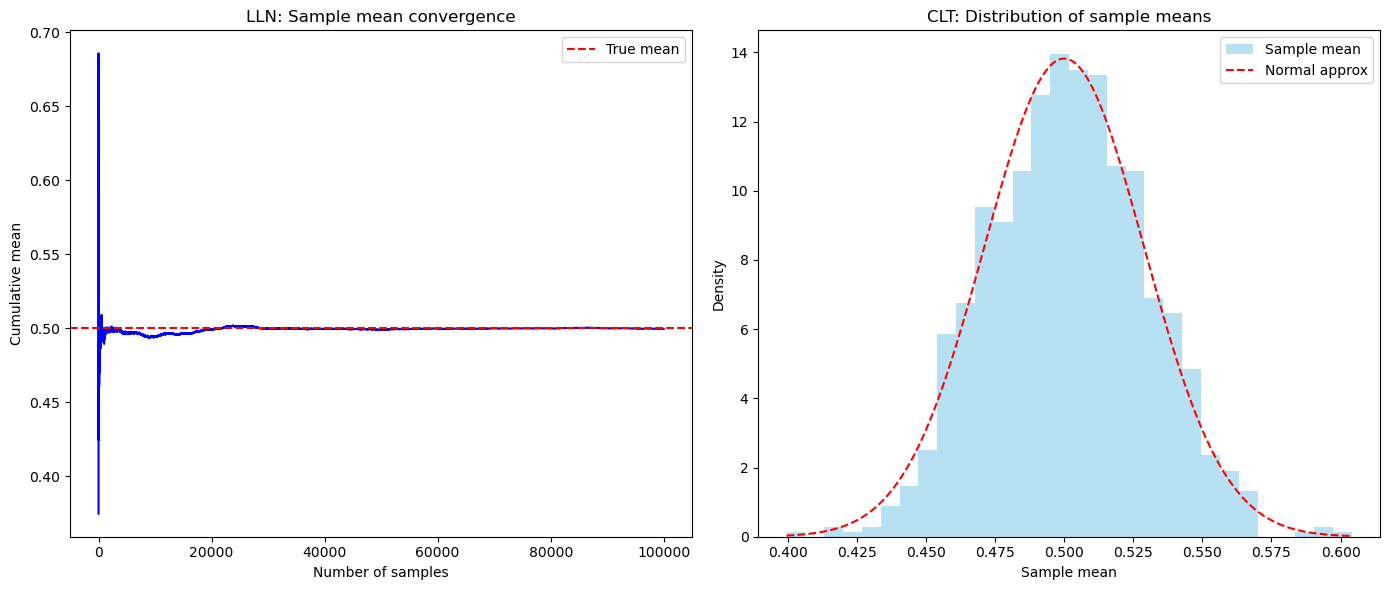

In [102]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

np.random.seed(42)

# --- 설정 ---
mu_true = 0.5          # 원래 분포 평균 (균등분포 0~1)
sigma_true = np.sqrt(1/12)  # 균등분포 0~1의 표준편차
n_samples = 100      # 한 번 평균낼 샘플 개수
n_experiments = 1000   # 평균 반복 계산 횟수

# --- LLN: 샘플 평균 누적 수렴 ---
samples = np.random.uniform(0, 1, n_samples * n_experiments)
cumulative_means = np.cumsum(samples) / np.arange(1, len(samples)+1)

# --- CLT: 각 실험마다 n_samples 평균 ---
sample_means = [np.mean(np.random.uniform(0,1,n_samples)) for _ in range(n_experiments)]

# --- 시각화 ---
plt.figure(figsize=(14,6))

# LLN 시각화
plt.subplot(1,2,1)
plt.plot(cumulative_means, color='blue')
plt.axhline(mu_true, color='red', linestyle='--', label='True mean')
plt.xlabel('Number of samples')
plt.ylabel('Cumulative mean')
plt.title('LLN: Sample mean convergence')
plt.legend()

# CLT 시각화
plt.subplot(1,2,2)
count, bins, ignored = plt.hist(sample_means, bins=30, density=True, alpha=0.6, color='skyblue', label='Sample mean')
# 정규분포 곡선
x = np.linspace(min(sample_means), max(sample_means), 1000)
plt.plot(x, norm.pdf(x, mu_true, sigma_true/np.sqrt(n_samples)), 'r--', label='Normal approx')
plt.xlabel('Sample mean')
plt.ylabel('Density')
plt.title('CLT: Distribution of sample means')
plt.legend()
plt.tight_layout()
plt.show()

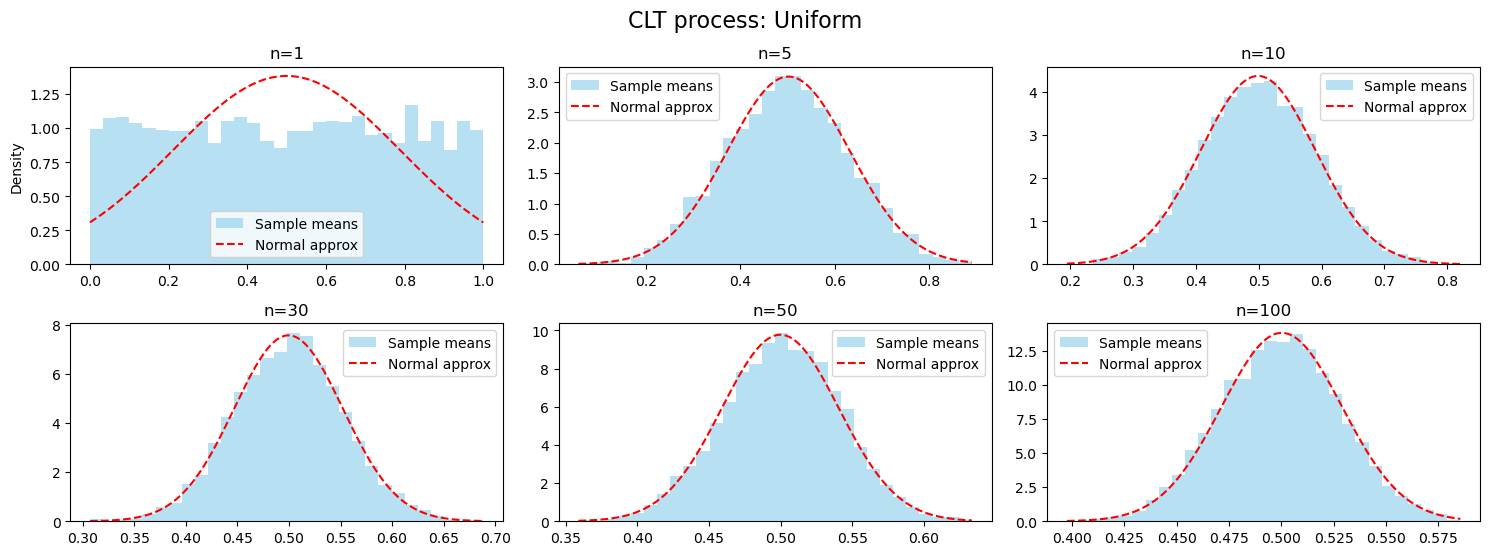

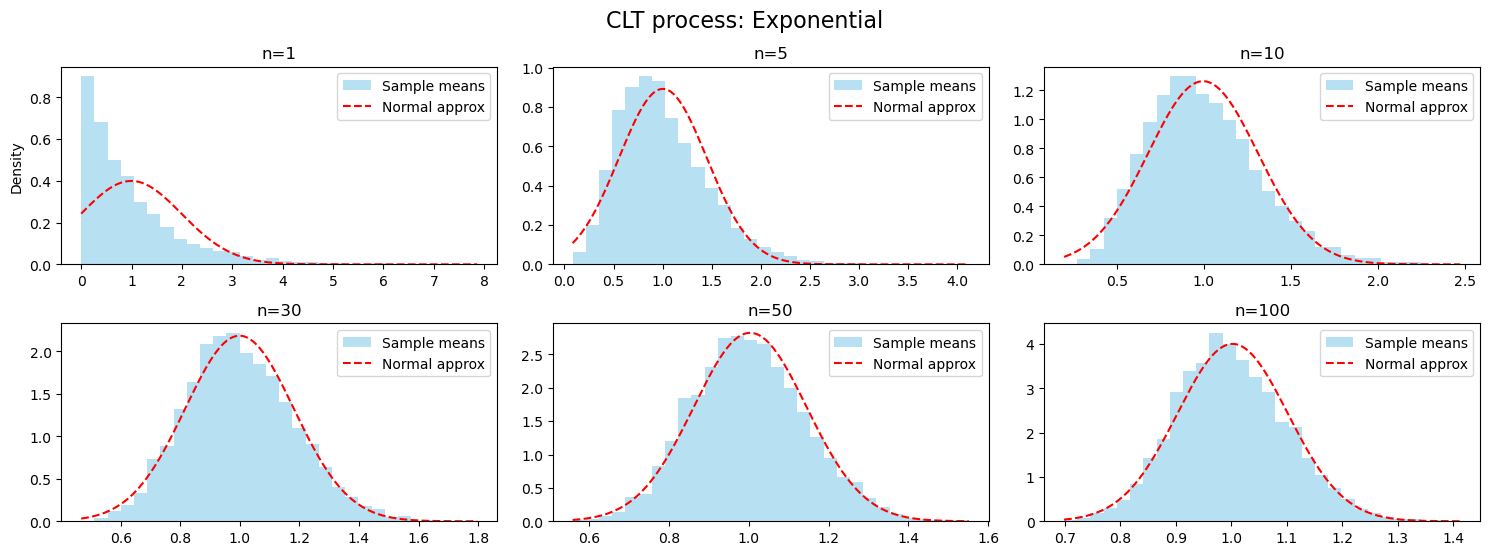

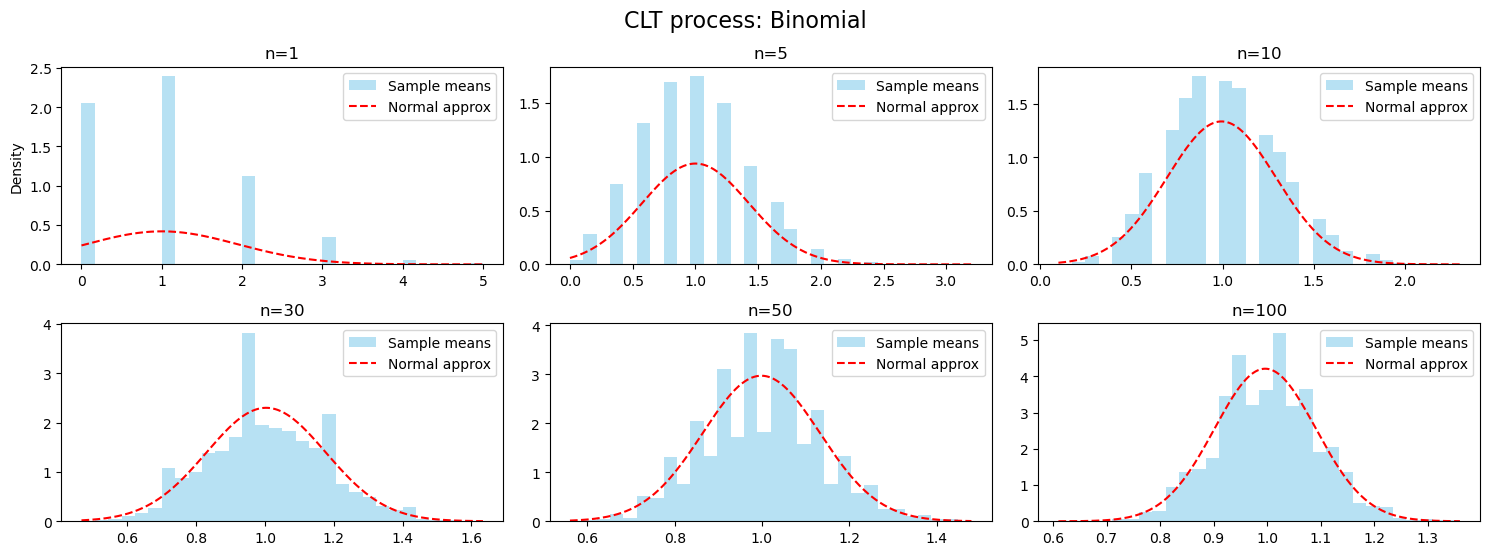

In [109]:
## import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

np.random.seed(42)

# 사용할 분포 정의
distributions = {
    'Uniform': lambda n: np.random.uniform(0,1,n),
    'Exponential': lambda n: np.random.exponential(1,n),
    'Binomial': lambda n: np.random.binomial(10, 0.1, n)
}

n_rows = len(distributions)
n_experiments = 5000  # 평균 반복 계산 횟수
sample_sizes = [1, 5, 10, 30, 50, 100]  # 샘플 수 변화

# 각 분포별로 CLT 과정 시각화
for name, dist_func in distributions.items():
    plt.figure(figsize=(15,8))
    plt.suptitle(f'CLT process: {name}', fontsize=16)
    
    for i, n_samples in enumerate(sample_sizes, 1):
        # 샘플 평균 계산
        sample_means = [np.mean(dist_func(n_samples)) for _ in range(n_experiments)]
        
        # 근사 모평균과 표준편차 계산 (대략)
        large_sample = dist_func(100000)
        mu = np.mean(large_sample)
        sigma = np.std(large_sample) / np.sqrt(n_samples)
        
        # 시각화
        plt.subplot(n_rows, len(sample_sizes)//n_rows + 1, i)
        plt.hist(sample_means, bins=30, density=True, alpha=0.6, color='skyblue', label='Sample means')
        x = np.linspace(min(sample_means), max(sample_means), 500)
        plt.plot(x, norm.pdf(x, mu, sigma), 'r--', label='Normal approx')
        plt.title(f'n={n_samples}')
        plt.savefig(f'imgs/central_limit_theorem_{name}.png', dpi=300)
        if i == 1:
            plt.ylabel('Density')
        plt.legend()
        
    plt.tight_layout()
    plt.show()